In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import inventorize3 as inv 

In [3]:
import os

In [4]:
os.getcwd()

'C:\\Users\\kaust'

In [5]:
os.chdir('C:\\Users\\kaust\\OneDrive\\Desktop\\Supply Chain Analytics')

In [6]:
retail = pd.read_csv('online_retail2.csv')

In [7]:
retail= retail.drop_duplicates()
retail= retail.dropna()
retail= retail[retail.Quantity > 0]
retail_clean= retail.copy()
retail_clean['Revenue']= retail['Price']* retail['Quantity']
retail_clean.to_csv('retail_clean.csv')
retail_clean.columns
grouped= retail_clean.groupby('Description'
            ).agg(total_sales= ('Quantity',np.sum),
                  total_revenue= ('Revenue',np.sum)).reset_index()

grouped.to_csv('for_abc.csv')

In [8]:
grouped


,Description,total_sales,total_revenue
0,DOORMAT UNION JACK GUNS AND ROSES,167,1071.25
1,3 STRIPEY MICE FELTCRAFT,662,1241.10
2,4 PURPLE FLOCK DINNER CANDLES,324,495.16
3,50'S CHRISTMAS GIFT BAG LARGE,1885,2272.25
4,ANIMAL STICKERS,385,80.85
...,...,...,...
5278,ZINC T-LIGHT HOLDER STARS SMALL,4894,3879.98
5279,ZINC TOP 2 DOOR WOODEN SHELF,242,1477.90
5280,ZINC WILLIE WINKIE CANDLE STICK,6166,5127.22
5281,ZINC WIRE KITCHEN ORGANISER,25,156.80


In [9]:

a = inv.ABC(grouped[['Description','total_sales']])

In [10]:
a.Category.value_counts()

C    2881
B    1245
A    1157
Name: Category, dtype: int64

In [11]:
a

,Description,total_sales,Percentage,comulative,Category
5168,WORLD WAR 2 GLIDERS ASSTD DESIGNS,105185,9.990307e-03,0.009990,A
5047,WHITE HANGING HEART T-LIGHT HOLDER,91757,8.714937e-03,0.018705,A
3129,"PAPER CRAFT , LITTLE BIRDIE",80995,7.692779e-03,0.026398,A
292,ASSORTED COLOUR BIRD ORNAMENT,78234,7.430543e-03,0.033829,A
2695,MEDIUM CERAMIC TOP STORAGE JAR,77916,7.400340e-03,0.041229,A
...,...,...,...,...,...
3451,PINK STRIPES SHOULDER BAG,1,9.497844e-08,1.000000,C
4370,SILVER AND BLACK ORBIT NECKLACE,1,9.497844e-08,1.000000,C
479,BLACK DIAMOND CLUSTER EARRINGS,1,9.497844e-08,1.000000,C
4271,SET/2 SPOTTY + ROSE TEA TOWELS,1,9.497844e-08,1.000000,C


<AxesSubplot:xlabel='Category', ylabel='count'>

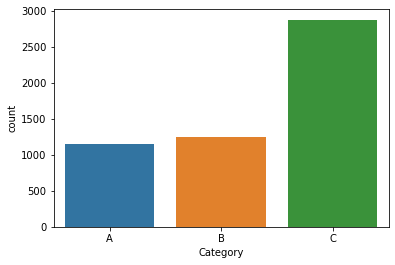

In [12]:
sns.countplot(x='Category', data = a)

<AxesSubplot:xlabel='Category', ylabel='total_sales'>

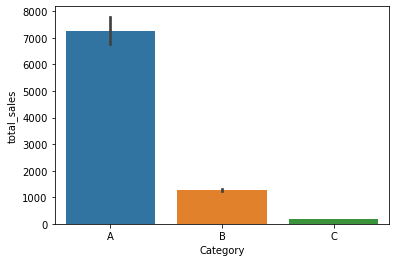

In [13]:
sns.barplot(x='Category', y = 'total_sales', data=a)

In [14]:
### Multi Crietirion abc Analysis
b=inv.productmix(grouped['Description'],grouped['total_sales'],grouped['total_revenue'])

In [15]:
b.columns

Index(['skus', 'sales', 'revenue', 'sales_mix', 'comulative_sales',
       'revenue_mix', 'comulative_revenue', 'sales_category',
       'revenue_category', 'product_mix'],
      dtype='object')

In [16]:
b.product_mix.value_counts()

C_C    2394
A_A     775
B_B     632
C_B     413
B_C     325
A_B     317
B_A     288
C_A      74
A_C      65
Name: product_mix, dtype: int64

<AxesSubplot:xlabel='product_mix', ylabel='count'>

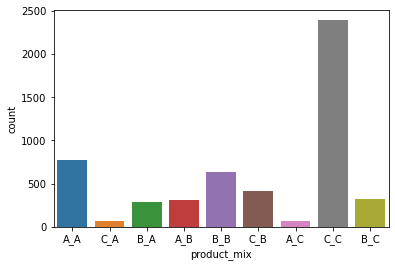

In [17]:
sns.countplot(x = 'product_mix', data = b)

<AxesSubplot:xlabel='product_mix', ylabel='sales'>

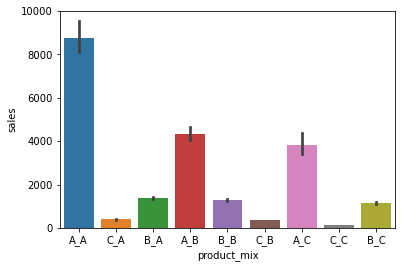

In [18]:
sns.barplot(x='product_mix', y='sales', data = b)

<AxesSubplot:xlabel='product_mix', ylabel='revenue'>

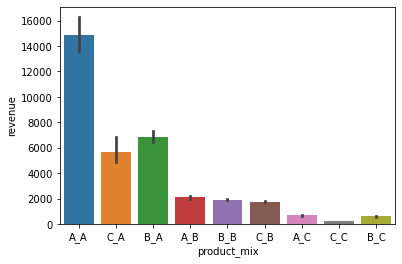

In [19]:
sns.barplot(x='product_mix', y = 'revenue',data = b)

In [21]:
by_store=retail_clean.groupby(['Country','Description']).agg(total_sales=('Quantity',np.sum),
                                                   total_revenue = ('Revenue',np.sum)).reset_index()

In [23]:
mix_country=inv.productmix_storelevel(by_store['Description'],
                         by_store['total_sales'],
                         by_store['total_revenue'],
                         by_store['Country'])

C:\Users\kaust\anaconda3\lib\site-packages\inventorize3\__init__.py:1102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store['sales_mix']= store['sales']/sum(store['sales'])


In [25]:
mix_country.groupby(['storeofsku','product_mix']).count().reset_index().iloc[:,0:3]

,storeofsku,product_mix,sku
0,Australia,A_A,176
1,Australia,A_B,79
2,Australia,A_C,7
3,Australia,B_A,76
4,Australia,B_B,104
...,...,...,...
348,West Indies,B_B,4
349,West Indies,B_C,4
350,West Indies,C_A,6
351,West Indies,C_B,3
